In [1]:
import openpharmacophore as oph
import pyunitwizard as puw

import numpy as np

# Er-alpha

## Pharmacophore of the protein-ligand complex of estrogen receptor with estradiol.

In [2]:
protein = oph.load("../data/er_alpha_A_chain.pdb")
print(f"Protein has {protein.n_atoms} atoms")

# We know that the file contains a single ligand
lig_ids = protein.ligand_ids
print(lig_ids)

Protein has 2010 atoms
['EST:B']


We obtain the smiles of the ligand. Necessary to fix its bond order later

In [3]:
smiles = oph.smiles_from_pdb_id(lig_ids[0])
smiles

'C[C@]12CC[C@@H]3c4ccc(cc4CC[C@H]3[C@@H]1CC[C@@H]2O)O'

We extract the ligand and fix its bond order and add hydrogens

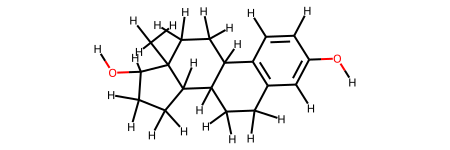

In [4]:
ligand = protein.get_ligand(lig_ids[0])
ligand.fix_bond_order(smiles=smiles)
ligand.add_hydrogens()

ligand.draw()

In [5]:
protein.remove_ligand(lig_ids[0])
print(f"Has ligand: {protein.has_ligands}")

Has ligand: False


We add hydrogens to the protein

In [6]:
protein.add_hydrogens()
print(f"Protein has {protein.n_atoms} atoms after adding hydrogens")

Protein has 4039 atoms after adding hydrogens


We need to extract the binding site from the protein, so we can get pharmacophoric features

In [7]:
bsite = oph.ComplexBindingSite(protein, ligand)

## Obtaining the pharmacophore

In [8]:
pharmacophore = oph.LigandReceptorPharmacophore(bsite, ligand)
pharmacophore.extract()

In [9]:
print(f"Number of pharmacophoric points {len(pharmacophore[0])}")
for p in pharmacophore[0]:
    print(p)

Number of pharmacophoric points 3
PharmacophoricPoint(feat_type=aromatic ring; center=(102.81, 16.72, 24.52); radius=1.0; direction=(0.09, 0.5, -0.86))
PharmacophoricPoint(feat_type=hydrophobicity; center=(107.21, 12.57, 22.11); radius=1.0)
PharmacophoricPoint(feat_type=hydrophobicity; center=(107.38, 12.45, 24.42); radius=1.0)


In [10]:
viewer = oph.Viewer()
viewer.add_components([protein, ligand, pharmacophore[0]])
viewer.show()

NGLWidget()

In [14]:
viewer.to_nglview().render_image()

Image(value=b'', width='99%')

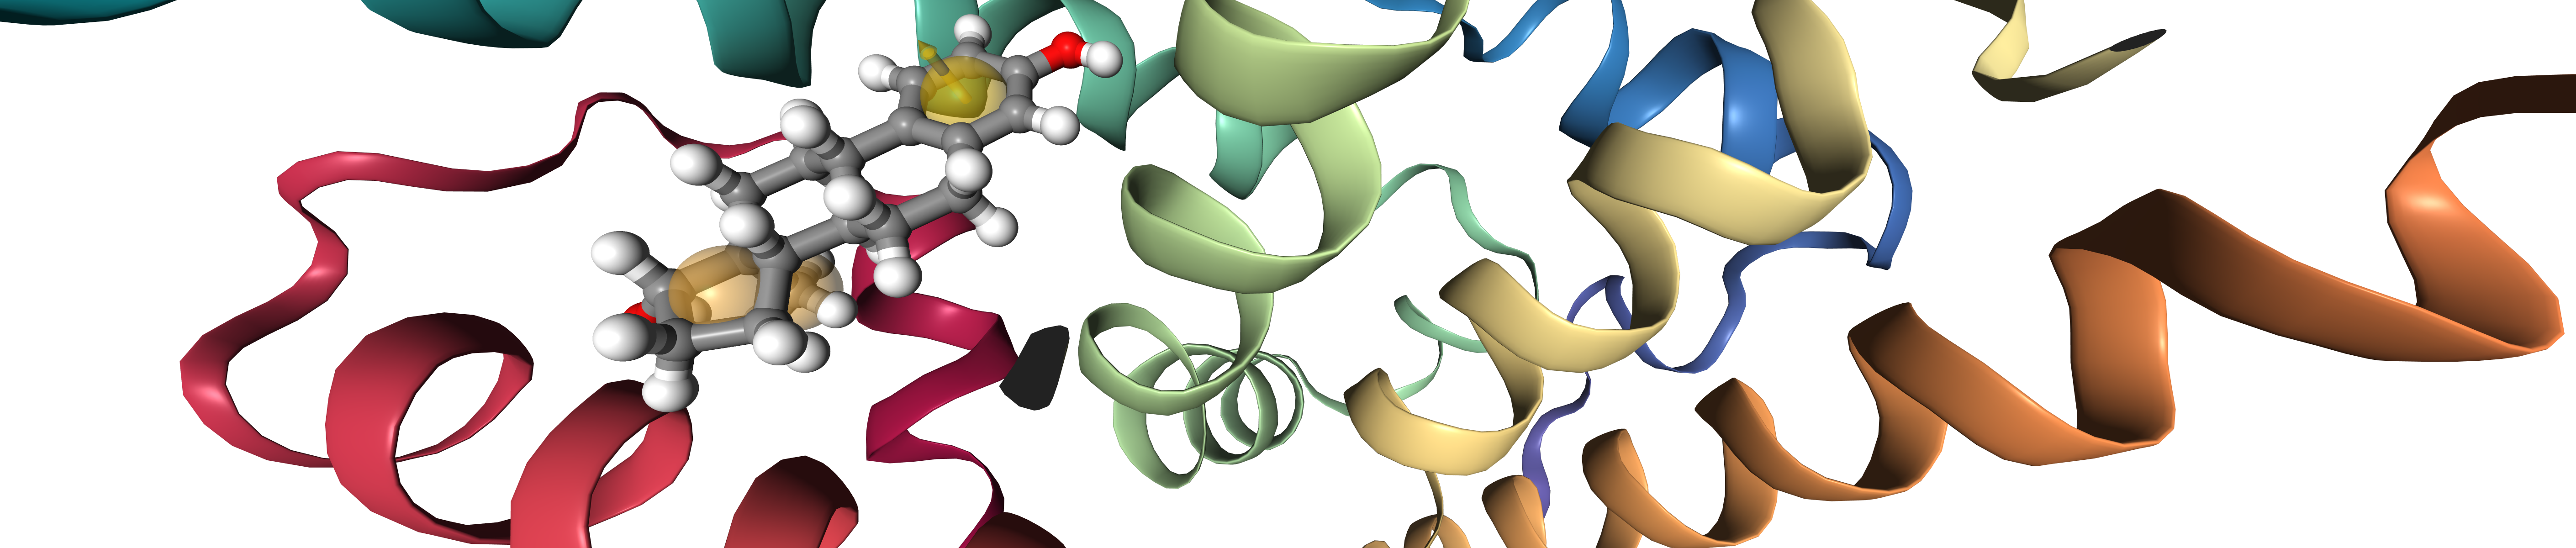

In [15]:
viewer.to_nglview()._display_image()